In [40]:
#importing required libraries

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [41]:
#importing dataset
df = pd.read_csv ('Dataset/nyc_jobs.csv')
df.head(3)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-23T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-23T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle Driverâ€™s License valid i...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-07-23T00:00:00.000


In [42]:
#Calculating Average salary and adding it as additional column

df = df.assign(avg_sal=df.loc[:,["Salary Range From","Salary Range To"]].mean(axis=1))

In [43]:
import numpy as np

df["avg_sal"]= np.where(df["Salary Frequency"]=="Daily", df["avg_sal"]*5*52, df["avg_sal"])
df["avg_sal"]= np.where(df["Salary Frequency"]=="Hourly", df["avg_sal"]*35*52, df["avg_sal"])

Text(0, 0.5, 'avg_sal')

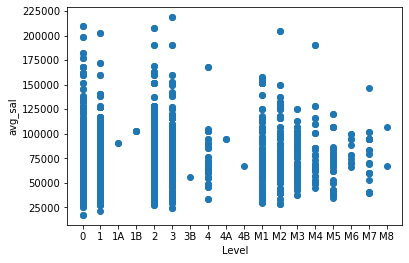

In [45]:
# K means clustering for Level and Average salary
Level_sorted = (df['Level'].sort_values(ascending=True))
plt.scatter(Level_sorted,df['avg_sal'])
plt.xlabel('Level')
plt.ylabel('avg_sal')

In [46]:
#Encoding Level and Job Category
#Categorical Encoding

def ordinal_encoding(st):
    dicts = {}
    values = range(len(st))
    keys = list(st)
    n= 0
    for i in keys:
        if n <= len(st):
            dicts[i] = n
            n = n+1
    return dicts


In [51]:
Level_mapping = ordinal_encoding(set(df["Level"]))
Job_category_mapping = ordinal_encoding(set(df["Job Category"]))

In [49]:
import category_encoders as ce

In [56]:
Encoder= ce.OrdinalEncoder(cols=['Level','Job Category'],return_df=True,
                           mapping=[{'col':'Level','mapping':Level_mapping},
                                    {'col':'Job Category','mapping':Job_category_mapping}])

In [59]:
df = Encoder.fit_transform(df)

In [60]:
#Checking for the encoded dataset
df.head(2)

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date,avg_sal
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,2,0,NaN,...,NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-23T00:00:00.000,53945.0
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,16,0,F,...,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-23T00:00:00.000,111377.0


In [64]:
#K Means clustering for features Level and average Salary
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Level','avg_sal']])
y_predicted

array([1, 2, 1, ..., 1, 1, 2])

In [ ]:
df['cluster']=y_predicted

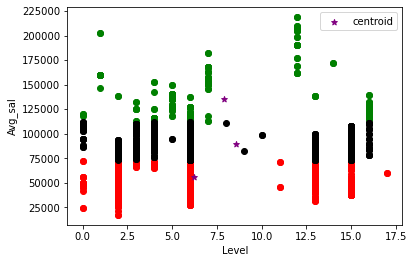

In [66]:
#Plotting graph for the developed cluster
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Level,df1['avg_sal'],color='green')
plt.scatter(df2.Level,df2['avg_sal'],color='red')
plt.scatter(df3.Level,df3['avg_sal'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Level')
plt.ylabel('Avg_sal')
plt.legend()

In [77]:
#K Means clustering for features Job Category and average Salary

km1 = KMeans(n_clusters=5)
y_predicted1 = km1.fit_predict(df[['Job Category','avg_sal']])
y_predicted1

array([4, 3, 4, ..., 0, 0, 3])

In [ ]:
df['cluster']=y_predicted1
df.head()

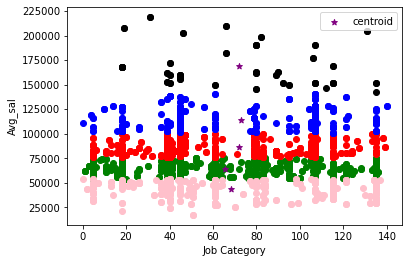

In [79]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
df4 = df[df.cluster==3]
df5 = df[df.cluster==4]


plt.scatter(df1['Job Category'],df1['avg_sal'],color='green')
plt.scatter(df2['Job Category'],df2['avg_sal'],color='red')
plt.scatter(df3['Job Category'],df3['avg_sal'],color='black')
plt.scatter(df4['Job Category'],df4['avg_sal'],color='blue')
plt.scatter(df5['Job Category'],df5['avg_sal'],color='pink')

plt.scatter(km1.cluster_centers_[:,0],km1.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Job Category')
plt.ylabel('Avg_sal')
plt.legend()